**[ CNN 관련 참고자료 ]**

<br>

http://taewan.kim/post/cnn/ (한글 설명) 
<br>

https://poloclub.github.io/cnn-explainer/ (CNN 내부의 구체적인 계산 과정 시각화) 

<br>

https://yceffort.kr/2019/01/29/pytorch-3-convolutional-neural-network (필터 예시) 
<br>

https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1 (필터 예시) 
<br>

https://goo.gl/zsSQ8z (필터 예시) 

<br>

https://blog.exxactcorp.com/lets-learn-the-difference-between-a-deep-learning-cnn-and-rnn/ (필터 적용 예시 on MNIST) 
<br>

https://medium.com/@phidaouss/convolutional-neural-networks-cnn-or-convnets-d7c688b0a207 (필터 적용 시각화)

<br>

https://www.slideshare.net/yongho/ss-79607172 (CNN 개념 이해) 
<br>

https://www.youtube.com/playlist?list=PLl1irxoYh2wzOOU9hvJqMYc215wAlxrpp (CNN 개념 이해)

In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import Activation, BatchNormalization, Dropout

from tensorflow.keras.utils import plot_model

import math
import numpy as np
import matplotlib.pyplot as plt

2.8.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


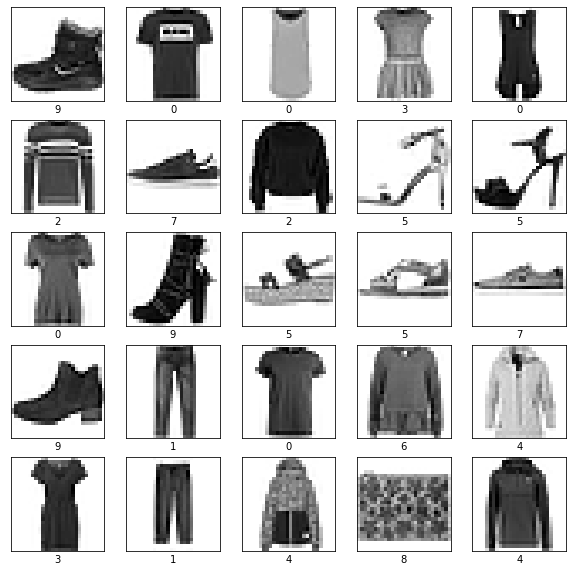

In [3]:
# class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

plt.show()

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
print(train_images.shape)
print(train_labels[0])

(60000, 28, 28, 1)
9


# 1.

In [6]:
model = tf.keras.Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D()) # default = (2, 2)

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

In [9]:
BATCH_SIZE = 128
num_train_examples = len(train_images)

history = model.fit(train_images, train_labels, 
                    epochs=10, 
                    batch_size=BATCH_SIZE, # Mini-batch 
                    steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE)) # Mini-batch 

Epoch 1/10
469/469 [==============================] - 32s 45ms/step - loss: 0.4898 - sparse_categorical_accuracy: 0.8208
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.2691 - sparse_categorical_accuracy: 0.9019
Epoch 3/10
469/469 [==============================] - 20s 44ms/step - loss: 0.2235 - sparse_categorical_accuracy: 0.9178
Epoch 4/10
469/469 [==============================] - 21s 44ms/step - loss: 0.1926 - sparse_categorical_accuracy: 0.9293
Epoch 5/10
469/469 [==============================] - 21s 44ms/step - loss: 0.1696 - sparse_categorical_accuracy: 0.9370
Epoch 6/10
469/469 [==============================] - 21s 44ms/step - loss: 0.1454 - sparse_categorical_accuracy: 0.9466
Epoch 7/10
469/469 [==============================] - 21s 44ms/step - loss: 0.1254 - sparse_categorical_accuracy: 0.9536
Epoch 8/10
469/469 [==============================] - 21s 44ms/step - loss: 0.1080 - sparse_categorical_accuracy: 0.9599
Epoch 9/10
469/469 [============

In [10]:
result = model.evaluate(test_images, test_labels, verbose=2)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

313/313 - 3s - loss: 0.2415 - sparse_categorical_accuracy: 0.9289 - 3s/epoch - 9ms/step
loss (cross-entropy) : 0.241453155875206
test accuracy : 0.9289000034332275


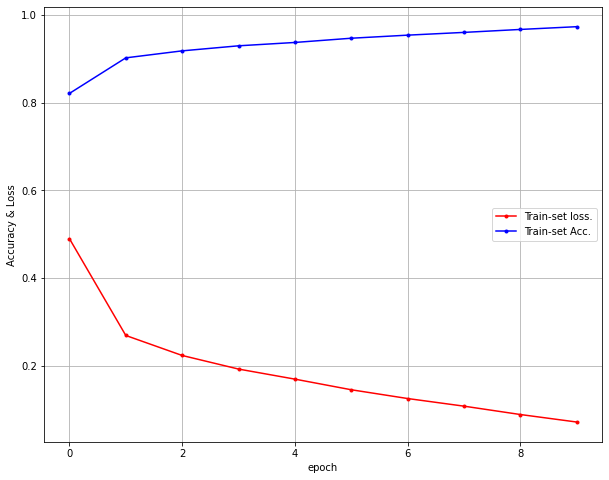

In [11]:
loss = history.history['loss']
acc = history.history['sparse_categorical_accuracy']

x_len = np.arange(len(acc))

plt.figure(figsize=(10, 8))
plt.plot(x_len, loss, marker='.', c='red', label="Train-set loss.")
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")

plt.legend(loc='center right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy & Loss')
plt.show()